# Imports 

In [1]:
print('hi')

hi


In [2]:
import sys
sys.path

['C:\\Users\\Eesh Gupta\\Documents\\RU Research\\Chakram\\Multimode-Conditional-Displacements\\hpc_runs\\multimode_circle_grape\\sample workflow',
 'C:\\Users\\Eesh Gupta\\anaconda\\python38.zip',
 'C:\\Users\\Eesh Gupta\\anaconda\\DLLs',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib',
 'C:\\Users\\Eesh Gupta\\anaconda',
 '',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib\\site-packages',
 'c:\\users\\eesh gupta\\documents\\ru research\\chakram\\qoc',
 'c:\\users\\eesh gupta\\documents\\ru research\\chakram\\quantum-optimal-control',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib\\site-packages\\locket-0.2.1-py3.8.egg',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib\\site-packages\\win32',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Eesh Gupta\\.ipython']

In [3]:
%matplotlib inline
import os
import sys
import inspect
import numpy as np
from scipy.special import factorial
import h5py

#data_path = '/data'     ... data path specified later
#data_path
#initial_pulse = '../pulses/example_pulses/transmon_cat_initial_pulse.h5'
from h5py import File
import matplotlib.pyplot as plt
from pylab import*
from qutip import*

from scipy import interpolate
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)


In [4]:
from quantum_optimal_control.helper_functions.grape_functions import *
from quantum_optimal_control.main_grape.grape import Grape
from quantum_optimal_control import*

In [5]:
%load_ext autoreload
%autoreload 2

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

# 3DMM2 parameters

In [6]:
# chi = Peak splitting MHz
chis = 2*array([-33.1962, -0.8676]) 
kappas  = array([0,0]) # kHz

# Multimode circle grape

In [7]:
#TODO: Figure out why relative import doesn't work
from circle_grape_v3 import *

done


In [8]:
transmon_levels = 2

#  Params :  $\alpha = 30.0 , \delta_c = -0.030$ GHz, $\tau = 500$ ns, $\Omega_{max} =1$ MHz

In [9]:
mode = 0
mode_levels = 2
chi,kappa = chis[mode]*1e-6,kappas[mode]*1e-6
circle_grape_params = {"chis":[chi],"kappas":[kappa],"alpha":30.0,"delta_c":-0.01}

op = multimode_circle_grape_optimal_control(mode_state_num = mode_levels,
                                            number_of_modes = 1,hparams = circle_grape_params,add_disp_kerr=False)




In [10]:
import sys
sys.path

['C:\\Users\\Eesh Gupta\\Documents\\RU Research\\Chakram\\Multimode-Conditional-Displacements\\hpc_runs\\multimode_circle_grape\\sample workflow',
 'C:\\Users\\Eesh Gupta\\anaconda\\python38.zip',
 'C:\\Users\\Eesh Gupta\\anaconda\\DLLs',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib',
 'C:\\Users\\Eesh Gupta\\anaconda',
 '',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib\\site-packages',
 'c:\\users\\eesh gupta\\documents\\ru research\\chakram\\qoc',
 'c:\\users\\eesh gupta\\documents\\ru research\\chakram\\quantum-optimal-control',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib\\site-packages\\locket-0.2.1-py3.8.egg',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib\\site-packages\\win32',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Eesh Gupta\\.ipython']

In [12]:
data_path = ''#'/home/eag190/Multimode-Conditional-Displacements/hpc_runs/multimode_circle_grape/sample workflow/data'

In [11]:
states_forbidden_list = []
total_time = 10#5000.0
steps  = 10#500  #number of points over the total time where amplitudes will be specified

convergence = {'rate': 0.1, 'update_step': 10, 'max_iterations': 100,
               'conv_target': 3e-4, 'learning_rate_decay': 500.0}


reg_coeffs = {'dwdt': 0.1, 'd2wdt2': 1.0e-3, 'forbid_dressed': False,
             'states_forbidden_list':states_forbidden_list,
              'forbidden_coeff_list': [1.0*steps] * len(states_forbidden_list)}



initial_guess = None

ss = op.run_optimal_control(state_transfer = True, initial_states = [0], target_states = [1], 
                        total_time = total_time, steps = steps,max_amp = 1e-2, 
                        taylor_terms = None,is_dressed=False, 
                        convergence = convergence, reg_coeffs =  reg_coeffs,
                        plot_only_g = True,
                        states_forbidden_list = states_forbidden_list,initial_guess = initial_guess, 
                        file_name="g0_to_g1_circlgrape", data_path=data_path, save = True)

[2, 2, 2]
starting states:
[array([1., 0., 0., 0.])]
target states:
[array([0., 1., 0., 0.])]
[]
data saved at: /home/eag190/Multimode-Conditional-Displacements/hpc_runs/multimode_circle_grape/sample workflow/data\00000_g0_to_g1_circlgrape.h5


c:\users\eesh gupta\documents\ru research\chakram\quantum-optimal-control\quantum_optimal_control\helper_functions\data_management.py:13: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  h5py.File.__init__(self, *args, **kwargs)


OSError: Unable to create file (unable to open file: name = '/home/eag190/Multimode-Conditional-Displacements/hpc_runs/multimode_circle_grape/sample workflow/data\00000_g0_to_g1_circlgrape.h5', errno = 2, error message = 'No such file or directory', flags = 15, o_flags = 502)

In [ ]:
hf = op.openfile()

TypeError: 'NoneType' object is not subscriptable

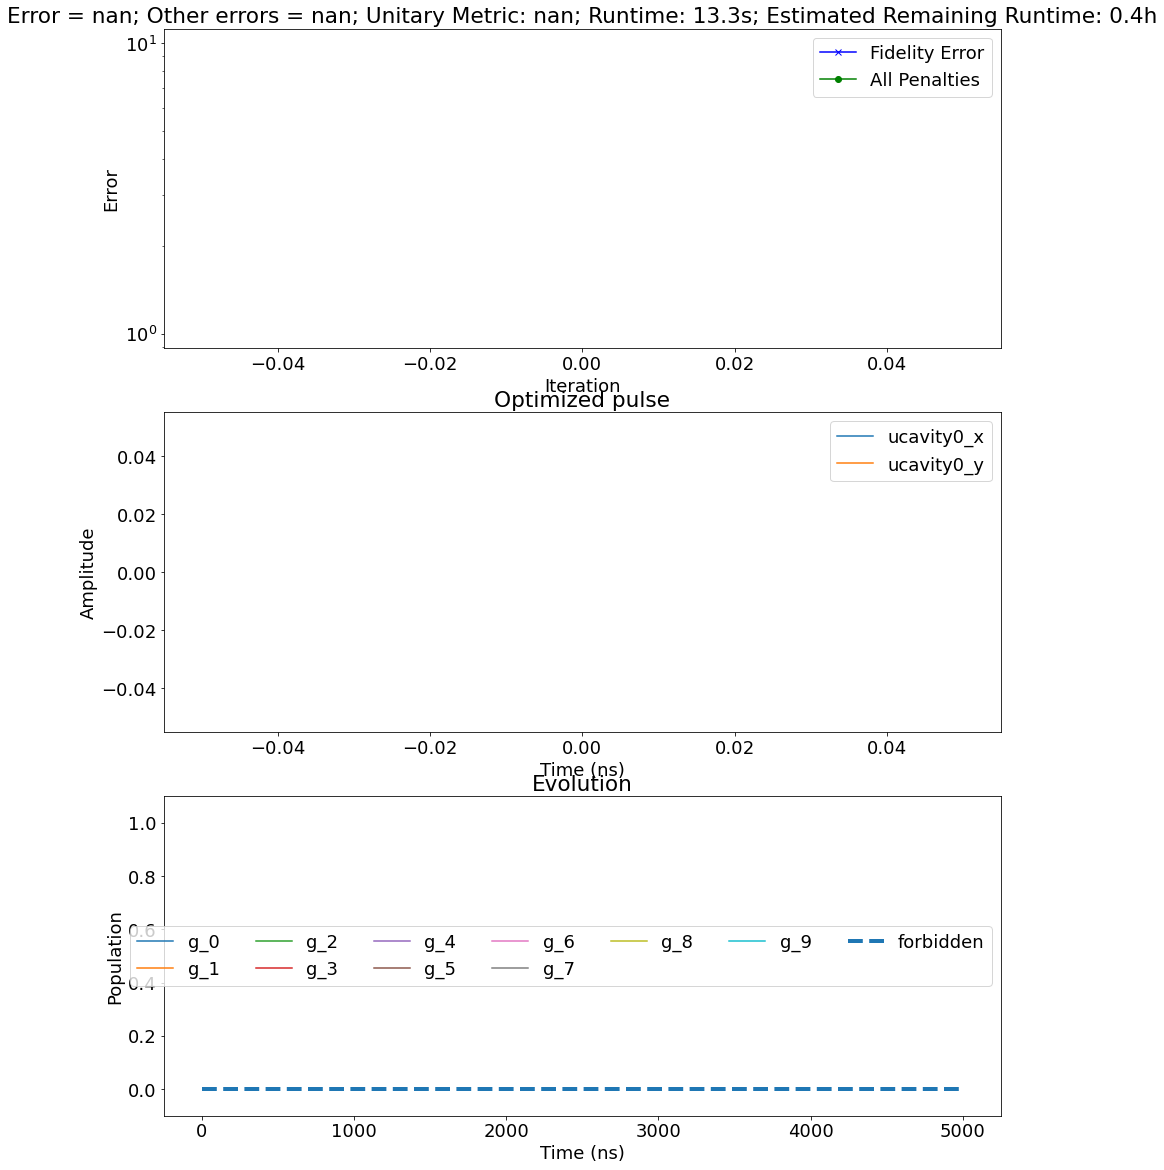

In [17]:
mode = 0
mode_levels = 10
chi,kappa = chis[mode]*1e-3,kappas[mode]*1e-6
circle_grape_params = {"chis":[chi],"kappas":[kappa],"alpha":1.0,"delta_c":-0.0010}

op = multimode_circle_grape_optimal_control(mode_state_num = mode_levels,
                                            number_of_modes = 1,hparams = circle_grape_params,add_disp_kerr=False)


states_forbidden_list = []
total_time = 5000.0
steps  = 100

convergence = {'rate': 0.1, 'update_step': 10, 'max_iterations': 1000,
               'conv_target': 3e-4, 'learning_rate_decay': 500.0}


reg_coeffs = {'dwdt': 0.1, 'd2wdt2': 1.0e-3, 'forbid_dressed': False,
              'states_forbidden_list':states_forbidden_list,
              'forbidden_coeff_list': [1.0*steps] * len(states_forbidden_list)}



initial_guess = None
# initial_guess = np.ones((2, int(steps))) * 2*np.pi * 10.0e-6/np.sqrt(2)
# initial_guess = np.random.normal(loc=0.0, scale=2*np.pi*15e-7, size=(len(Hops), int(steps)))


# expt_name = 'g0_to_g2_blockade'
# file_number = 29
# initial_pulse = "S:/_Data/191018 - Picollo cavity cooldown 15 real\\optimal control pulses\\blockade_pulses\\" + \
#                 str(file_number).zfill(5) + "_" + expt_name.lower()+".h5"

# with h5py.File(initial_pulse,'r') as hf:
#     last_u0 = np.array(hf['uks'])[-1]
# initial_guess = last_u0


op.run_optimal_control(state_transfer = True, initial_states = [0], target_states = [1], 
                        total_time = total_time, steps = steps,max_amp = 1e-3, 
                        taylor_terms = None,is_dressed=False, 
                        convergence = convergence, reg_coeffs =  reg_coeffs,
                        plot_only_g = True,
                        states_forbidden_list = states_forbidden_list,initial_guess = initial_guess, 
                        file_name="g0_to_g1_circlgrape", data_path=data_path)

In [ ]:
hf['error'][-1]

In [ ]:
op.plot_pulses()

In [ ]:
ss

In [ ]:
len(ss[0][0])

In [ ]:
op.fidelity()

In [ ]:
import os 
data_path = '/home/eag190/Multimode-Conditional-Displacements/hpc_runs/multimode_circle_grape/sample workflow/data'
file_path = 'test.h5'
file_path_f = os.path.join(data_path, file_path)
file_path_f

In [ ]:
hf = h5py.File(file_path_f, 'w')


In [ ]:
get_dressed_info

In [ ]:
w_c, v_c, dressed_id = get_dressed_info(op.H_rot())

In [ ]:
w_c

In [ ]:
v_c

In [ ]:
dressed_id